# Exemplo: Modelando Diabetes com Machine Learning

### Referência: [End-to-End Data Science Example: Predicting Diabetes with Logistic Regression](https://towardsdatascience.com/end-to-end-data-science-example-predicting-diabetes-with-logistic-regression-db9bc88b4d16)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.externals import joblib

/home/zanco/miniconda3/envs/qualirede/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## Dataset information

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skin fold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: Diabetes pedigree function
- **Age**: Age (years)
- **Outcome**: Class variable (0 or 1)




### Carregando o Dataset

In [2]:
diabetesDF = pd.read_csv('diabetes.csv')
diabetesDF.head(n=15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Separando o Dataset em conjuntos de treinamento, validação e teste
#### Normalizando os dados

In [4]:
X = diabetesDF.drop('Outcome', axis=1).values
y = diabetesDF['Outcome'].values

# 72% Train, 18% Validation, 10% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print('Número de amostras no conjunto de treinamento:', y_train.size)
print('Número de amostras no conjunto de validação:', y_val.size)
print('Número de amostras no conjunto de teste:', y_test.size)

means = X_train.mean(axis=0)
stds = X_train.std(axis=0)

X_train = (X_train - means)/stds
X_val = (X_val - means)/stds
# X_test = (X_test - means)/stds

Número de amostras no conjunto de treinamento: 552
Número de amostras no conjunto de validação: 139
Número de amostras no conjunto de teste: 77


#### Treinamento e Validação

In [5]:
# Utilizando um classificador SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)

# After we train we test how well it works using our test data.
accuracy = svm_model.score(X_val, y_val)
print(f'Acurácia no conjunto de validação: {100 * accuracy:.2f}%')

Acurácia no conjunto de validação: 74.10%


In [6]:
# Utilizando Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

accuracy = lr_model.score(X_val, y_val)
print(f'Acurácia no conjunto de validação: {100 * accuracy:.2f}%')

Acurácia no conjunto de validação: 78.42%


In [7]:
lr_model.coef_

array([[ 0.3778678 ,  1.00478235, -0.32421889, -0.10283419, -0.01193679,
         0.79208621,  0.53944051,  0.22862968]])

### Interpretando o Modelo
#### To get a better sense of what is going on inside the logistic regression model, we can visualize how our model uses the different features and which features have greater effect.

In [8]:
coeff = list(lr_model.coef_[0])
coeff

[0.3778678034550479,
 1.004782345853524,
 -0.32421889107980956,
 -0.10283418796642059,
 -0.011936794989903719,
 0.7920862134060536,
 0.5394405059799222,
 0.22862967698933098]

In [9]:
feature_names = list(diabetesDF.drop('Outcome',1).columns)
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

Text(0.5, 0, 'Importance')

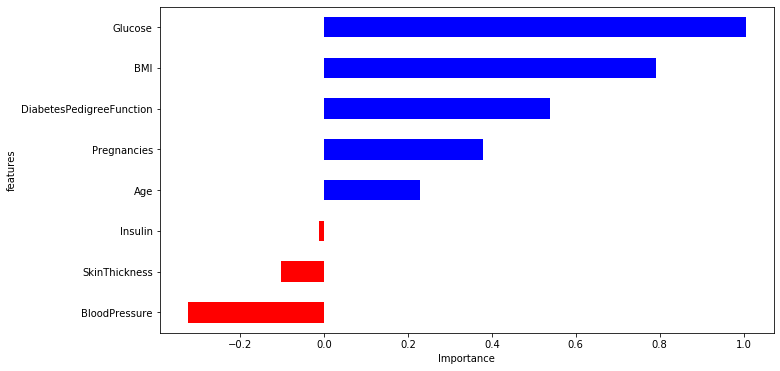

In [10]:
features = pd.DataFrame()
features['features'] = feature_names
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

#### Salvando e carregando modelos

In [11]:
# model saving and loading
joblib.dump([lr_model, means, stds], 'diabetes_model.pkl')


['diabetes_model.pkl']

In [12]:
# Carregando o modelo salvo
diabetesLoadedModel, means, stds = joblib.load('diabetes_model.pkl')
diabetesLoadedModel.coef_


array([[ 0.3778678 ,  1.00478235, -0.32421889, -0.10283419, -0.01193679,
         0.79208621,  0.53944051,  0.22862968]])

In [13]:
# Make prediction with loaded model
accuracyModel = diabetesLoadedModel.score(X_val, y_val)
print(f'Acurácia: {100 * accuracy:.2f}%')

Acurácia: 78.42%


### Testando o modelo

In [14]:
df_test = pd.DataFrame(X_test, columns=feature_names)
df_test.head(n=10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.0,199.0,76.0,43.0,0.0,42.9,1.394,22.0
1,2.0,107.0,74.0,30.0,100.0,33.6,0.404,23.0
2,4.0,76.0,62.0,0.0,0.0,34.0,0.391,25.0
3,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51.0
4,0.0,111.0,65.0,0.0,0.0,24.6,0.660,31.0
5,1.0,81.0,72.0,18.0,40.0,26.6,0.283,24.0
6,9.0,152.0,78.0,34.0,171.0,34.2,0.893,33.0
7,3.0,176.0,86.0,27.0,156.0,33.3,1.154,52.0
8,2.0,127.0,58.0,24.0,275.0,27.7,1.600,25.0
9,6.0,103.0,72.0,32.0,190.0,37.7,0.324,55.0


In [15]:
sampleDataFeatures = X_test
sampleDataFeatures = (sampleDataFeatures - means)/stds

print(sampleDataFeatures[0])

[-0.87213116  2.55332835  0.33776129  1.39829021 -0.69242219  1.38416222
  2.81571562 -0.98320102]


In [16]:
# predict
predictionProbability = diabetesLoadedModel.predict_proba(sampleDataFeatures)
prediction = diabetesLoadedModel.predict(sampleDataFeatures)

print('Probability:', predictionProbability[1])
print('Prediction (Outcome):', prediction[1])

Probability: [0.84834445 0.15165555]
Prediction (Outcome): 0


In [17]:
accuracy = diabetesLoadedModel.score((X_test - means)/stds, y_test)
print(f'Acurácia: {100 * accuracy:.2f}%')


Acurácia: 84.42%
